# Master's Thesis Experiments Report

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scripts.utils import load_latency_data, load_packet_data

In [2]:
# constants
LAST_FRAME = 526
FIG_DIR = './figures/{}'

## 1.   Pipeline Latency
The data was replayed at 8 Mbps.
For each frame f, we measure the timedelta between the last emitted LiDAR data packet and
the last incoming Palicus data packet containing data associated with f.
We exclude the first and the last frame to ensure that we only consider the latency of full frames.

In [3]:
fig_dir = FIG_DIR.format('8Mbps')
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [4]:
# Load the data
df_conversion = load_latency_data(max_frame=LAST_FRAME - 1)
df_roi = load_latency_data(pipeline='roi', max_frame=LAST_FRAME - 1)
df_dm1 = load_latency_data(pipeline='dm1', max_frame=LAST_FRAME - 1)
df_dm2 = load_latency_data(pipeline='dm2', max_frame=LAST_FRAME - 1)
df_bev = load_latency_data(pipeline='bev', max_frame=LAST_FRAME - 1)
df_max = load_latency_data(pipeline='max', max_frame=LAST_FRAME - 1)

### Filter and Arithmetic Processing Elements

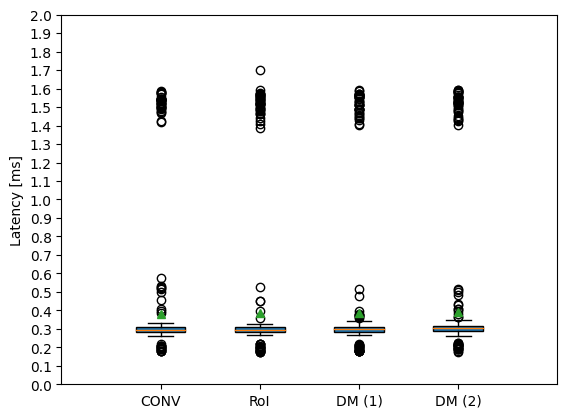

Mean Latency [ms]
Conversion 	 0.38026666666666664
RoI 		 0.38338666666666665
DM (1) 		 0.3858
DM (2) 		 0.3918419047619047


In [31]:
# computation time: conversion vs. RoI vs. DepthMap
fig, ax = plt.subplots()
ax.boxplot(df_conversion['latency [ms]'].to_numpy(), positions=[2], widths=[1],
           patch_artist=True, showmeans=True, showfliers=True, labels=['CONV'])
ax.boxplot(df_roi['latency [ms]'].to_numpy(), positions=[4], widths=[1],
           patch_artist=True, showmeans=True, showfliers=True, labels=['RoI'])
ax.boxplot(df_dm1['latency [ms]'].to_numpy(), positions=[6], widths=[1],
           patch_artist=True, showmeans=True, showfliers=True, labels=['DM (1)'])
ax.boxplot(df_dm2['latency [ms]'].to_numpy(), positions=[8], widths=[1],
           patch_artist=True, showmeans=True, showfliers=True, labels=['DM (2)'])
ax.set(xlim=(0, 10))
ax.set(ylim=(0, 2), yticks=[i / 10 for i in range(21)], ylabel='Latency [ms]')
plt.show()
print('Mean Latency [ms]')
print('Conversion \t', df_conversion.mean()['latency [ms]'])
print('RoI \t\t', df_roi.mean()['latency [ms]'])
print('DM (1) \t\t', df_dm1.mean()['latency [ms]'])
print('DM (2) \t\t', df_dm2.mean()['latency [ms]'])
fig.savefig(os.path.join(fig_dir, 'conv_roi_dm.png'))

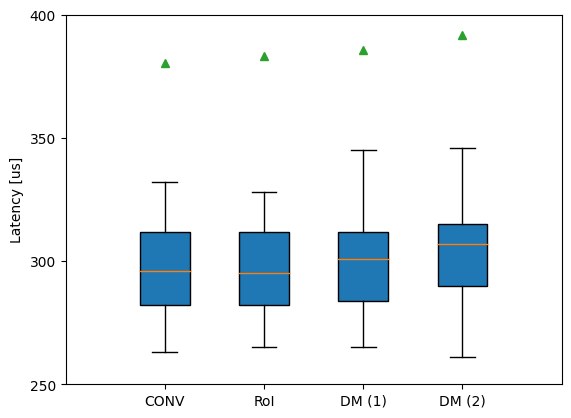

Mean Latency [us]
Conversion 	 380.26666666666665
RoI 		 383.38666666666666
DM (1) 		 385.8
DM (2) 		 391.84190476190474


In [36]:
# computation time: conversion vs. RoI vs. DepthMap
df_conversion['latency [us]'] = df_conversion['latency [ms]'] * 1000
df_roi['latency [us]'] = df_roi['latency [ms]'] * 1000
df_dm1['latency [us]'] = df_dm1['latency [ms]'] * 1000
df_dm2['latency [us]'] = df_dm2['latency [ms]'] * 1000


fig, ax = plt.subplots()
ax.boxplot(df_conversion['latency [us]'].to_numpy(), positions=[2], widths=[1],
           patch_artist=True, showmeans=True, showfliers=False, labels=['CONV'])
ax.boxplot(df_roi['latency [us]'].to_numpy(), positions=[4], widths=[1],
           patch_artist=True, showmeans=True, showfliers=False, labels=['RoI'])
ax.boxplot(df_dm1['latency [us]'].to_numpy(), positions=[6], widths=[1],
           patch_artist=True, showmeans=True, showfliers=False, labels=['DM (1)'])
ax.boxplot(df_dm2['latency [us]'].to_numpy(), positions=[8], widths=[1],
           patch_artist=True, showmeans=True, showfliers=False, labels=['DM (2)'])
ax.set(xlim=(0, 10))
ax.set(ylim=(250, 400), yticks=[250 + i * 50 for i in range(4)], ylabel='Latency [us]')
plt.show()
fig.savefig(os.path.join(fig_dir, 'conv_roi_dm_no_outliers.png'))


print('Mean Latency [us]')
print('Conversion \t', df_conversion.mean()['latency [us]'])
print('RoI \t\t', df_roi.mean()['latency [us]'])
print('DM (1) \t\t', df_dm1.mean()['latency [us]'])
print('DM (2) \t\t', df_dm2.mean()['latency [us]'])

### Aggregation Processing Element

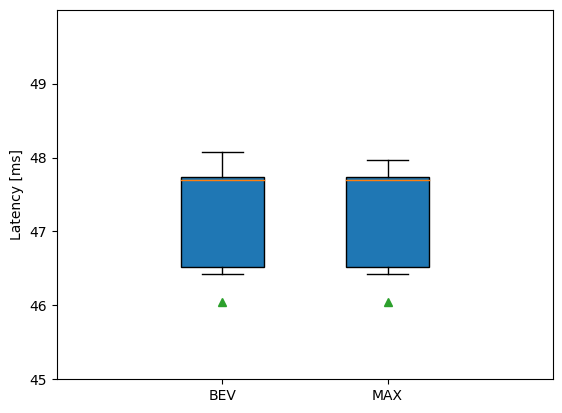

Mean Latency [ms]
BEV 		 46.04963047619047
MAX 		 46.0519561904762


In [37]:
# computation time: BEV vs. MAX
fig, ax = plt.subplots()
ax.boxplot(df_bev['latency [ms]'].to_numpy(), positions=[2], widths=[1],
           patch_artist=True, showmeans=True, showfliers=True, labels=['BEV'])
ax.boxplot(df_max['latency [ms]'].to_numpy(), positions=[4], widths=[1],
           patch_artist=True, showmeans=True, showfliers=True, labels=['MAX'])
ax.set(xlim=(0, 6))
ax.set(ylim=(45, 50), yticks=[45 + i for i in range(5)], ylabel='Latency [ms]')
plt.show()
fig.savefig(os.path.join(fig_dir, 'bev_max.png'))

print('Mean Latency [ms]')
print('BEV \t\t', df_bev.mean()['latency [ms]'])
print('MAX \t\t', df_max.mean()['latency [ms]'])

## 2. Point Rate

In [65]:
# Conversion
total_pkt = []
for p in ['conversion', 'roi', 'dm1', 'dm2', 'bev', 'max']:
    log = [p]
    for t in ['8Mbps', '128Mbps']:
        df = load_packet_data(throughput=t, pipeline=p, max_frame=LAST_FRAME-1)
        packet_count = len(df)
        log.append(packet_count)
    total_pkt.append(log)

df_res = pd.DataFrame(np.array(total_pkt), columns=['pipeline', '8Mbps', '128Mbps'])
df_res['difference'] = df_res.apply(lambda row: int(row['8Mbps']) - int(row['128Mbps']), axis=1)

print(df_res.head(10))

     pipeline   8Mbps 128Mbps  difference
0  conversion  237612  237615          -3
1         roi  227063  227045          18
2         dm1  227063  226994          69
3         dm2  227063  227018          45
4         bev    1558    1557           1
5         max    1558    1558           0
